![Colegio Bourbaki](./Images/Bourbaki.png)

## ESG indicators missing value estimation
by Pladifes (https://challengedata.ens.fr/challenges/87)

**Contexto del reto**

A medida que aumenta el número de inversores y de personas dispuestas a comprometerse con las preocupaciones medioambientales y sociales, las características extrafinancieras de las empresas (también denominadas ESG por Environment, Social and Governance) cobran cada vez más importancia.

Impactfull es una empresa que ofrece asesoramiento sobre finanzas sostenibles y datos extrafinancieros basados en datos brutos verificados procedentes de las empresas. Sus datos se componen de más de 30 indicadores (dentro de las categorías medioambiental, social y de gobernanza) y se extraen de los informes de sostenibilidad.

Pladifes es un proyecto de investigación alojado en el Institut Louis Bachelier, una asociación sin ánimo de lucro que promueve la investigación en economía y finanzas. Se trata de un EquipEx+ (código: ANR-21-ESRE-0036), financiado por la ANR y destinado a facilitar el acceso a datos extrafinancieros con fines de investigación.

Este reto es el resultado de una colaboración entre las dos partes mencionadas, como una oportunidad para ambas de ganar visibilidad y permitir a los estudiantes trabajar con (esperemos) interesantes datos financieros adicionales.

El equipo de Pladifes también tiene previsto incluir la mejor propuesta del reto en su base de datos, lo que permitirá a los investigadores utilizarla para proyectos académicos.


**Objetivos del reto**

El objetivo del reto es predecir los valores que faltan para 15 indicadores extrafinancieros corporativos (hasta un 96% de valores perdidos). Estos indicadores están disponibles durante tres años (2018, 2019, 2020) y provienen de divulgaciones de sostenibilidad.

En ambos conjuntos de entrada (X_train y X_test), algunos de los valores perdidos se añaden artificialmente en comparación con los de salida (y_train, y_test). Estos valores adicionales se utilizan para calcular el rendimiento del modelo comparando los valores imputados con los valores ocultos reales. Por lo demás, los archivos de entrada y salida tienen exactamente el mismo número de filas y columnas.

El objetivo es, por tanto, entrenar un modelo de imputación de valores perdidos en los datos de entrenamiento y utilizarlo en los datos de prueba para rellenar los huecos.

**Descripción de los datos**

Los datos de entrada contienen 15 indicadores financieros adicionales sobre 10 000 empresas durante un máximo de tres años (2018, 2019, 2020).

Cada línea está definida por un "ID" único y corresponde a una empresa determinada (definida por "company_id") y a un año determinado (definido por "year"). Los datos se han seleccionado de forma que no haya más de un 96% de valores perdidos para un indicador determinado. Las empresas son anónimas y se dividen en un conjunto de entrenamiento y otro de prueba, de modo que una empresa determinada sólo puede encontrarse en el conjunto de entrenamiento o en el de prueba.

La primera línea del archivo de entrada contiene la cabecera, y las columnas están separadas por comas. El tamaño total es inferior a 10Mo.

Los archivos de salida (y_train, y_test) serían los datos originales y los de entrada (X_train, X_test) los mismos pero con valores perdidos adicionales.

El número de valores enmascarados por columna es de al menos 100, como máximo el 15% de los valores no ausentes disponibles (tanto para X_train como para X_test).

| Column Name                           | Description                                               | Missing Value (%) |
| ------------------------------------- | --------------------------------------------------------- | ----------------- |
| anonimized_id                         | The index (unique)                                       | 0%                |
| company_id                            | The company id (unique)                                   | 0%                |
| year                                  | The year (2018, 2019, 2020)                               | 0%                |
| region                                | The region (5 options)                                    | 0%                |
| headquarters_country                  | The headquarter country (99 options)                     | 0%                |
| industry                              | The primary industry sector (153 options)                | 0%                |
| market cap                            | The "size of the company" (stock value x number of stocks, in $) | 0%                |
| employees                             | The number of employees of the company                    | 16%               |
| revenue                               | The annual revenue of the company (in $)                 | 2%                |
| scope_1                               | The scope 1 (direct) GHG emission of the company (in T/CO2e) | 66%               |
| scope_2                               | The scope 2 (indirect, owned) GHG emission of the company (in T/CO2e) | 66%               |
| scope_3                               | The scope 3 (indirect, not owned) GHG emission of the company (in T/CO2e) | 69%               |
| waste_production                      | The annual amount of waste produced (in T)               | 84%               |
| waste_recycling                       | The annual amount of waste recycled (in T)               | 89%               |
| water_consumption                     | The annual amount of water consumed (in T)              | 72%               |
| water_withdrawal                      | The annual amount of water withdrawn (in T)             | 74%               |
| energy_consumption                    | The annual energy consumption (in KWH)                   | 82%               |
| hours_of_training                     | The number of hours of training for all employees for one year (in H) | 87%               |
| gender_pay_gap                        | Mean men's annual earnings above women's annual earnings (in %) | 96%               |
| independant_board_members_percentage  | The percentage of independent members in the board of the company (in %) | 75%               |
| legal_costs_paid for_controversies     | The annual amount of the legal costs paid for controversies (in $) | 59%               |
| ceo_compensation                      | The annual CEO compensation (in $)                       | 92%               |


## Introducción a Missing Values 

La falta de datos es un problema común que aparece en contextos reales y puede comprometer
el rendimiento de la mayoría de los modelos de aprendizaje (Abreu et al., 2014a,b)

En la comunidad se reconocen tres mecanismos de ausencia de datos: (Baraldi and Enders, 2010; Rubin, 1976; Little and Rubin, 2019):

* Missing Completely At Random (MCAR): se produce cuando el mecanismo de la
omisión no está relacionado con ningún valor observado o no observado del conjunto de datos;

* Missing At Random (MAR): se produce cuando la causa de los datos que faltan está relacionada
con los valores observados del conjunto de datos;

* Missing Not At Random (MNAR): se produce cuando la probabilidad de que falte un valor
falta está relacionada con ese mismo valor y/o con otros datos desconocidos

![Missing Values](./Images/MissingValues.png)

## Librerias

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import missingno as msno  # Handling missing values viz

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preproccesing
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error

# Autoencoder Architecture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Utils
import os
import sys
from scipy.stats import zscore
from torchsummary import summary  # Display model summary
from tqdm.notebook import tqdm  # Display progress bar

## Configuraciones

### Valores Semilla

In [2]:
# Set seed for random generators
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

### GPU Management

In [3]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
!set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:16'
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [5]:
device

'cuda:0'

In [6]:
print("__Python VERSION:", sys.version)
print("__pyTorch VERSION:", torch.__version__, end="\n\n")

if torch.cuda.is_available():
    print("__CUDA VERSION")
    #! nvcc --version
    print("__CUDNN VERSION:", torch.backends.cudnn.version())
    print("__Number CUDA Devices:", torch.cuda.device_count())
    print("__Devices:")
    print("Active CUDA Device: GPU", torch.cuda.current_device())
    print("Available devices ", torch.cuda.device_count())
    print("Current cuda device ", torch.cuda.current_device())
    #! nvidia-smi

__Python VERSION: 3.11.7 (main, Dec 29 2023, 12:40:11) [GCC 11.4.0]
__pyTorch VERSION: 2.1.2+cu121

__CUDA VERSION
__CUDNN VERSION: 8904
__Number CUDA Devices: 1
__Devices:
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


### Display

In [7]:
# Set the display format to avoid exponential notation
pd.set_option("display.float_format", lambda x: "%.3f" % x)

### Funciones de ayuda

In [8]:
def correlation(dataframe, plot=True, matrix=False):
    """Devuelve la matriz de correlación de un dataframe,
    si plot=True, muestra un mapa de calor de la matriz de correlación,
    si matrix=True, devuelve la matriz de correlación"""
    corr = dataframe.corr(method="spearman")

    if plot:
        fig, ax = plt.subplots(figsize=(25, 20))
        mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
        cmap = sns.color_palette("coolwarm", as_cmap=True)
        sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True)

    if matrix:
        return corr

In [9]:
def normalized_mrse(y_true, y_pred):
    """Calcula el error cuadrático medio normalizado"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    range_y = np.max(y_true) - np.min(y_true)
    nrmse = rmse / range_y
    return nrmse

## Importación de datos

Los archivos de salida (y_train, y_test) serían los datos originales y los de entrada (X_train, X_test) los mismos pero con valores faltantes adicionales.

El archivo y_train actua de alguna manera de etiqueta frente al archivo X_train, ya que este tiene valores faltantes adicionales.

Usaremos el archivo y_train sin valores faltantes demás para entrenar el modelo, mientras que el archivo x_train hará de validador. X_test sera el testing, mientras que y_test será la respuesta al challenge.

In [10]:
df_x_train = pd.read_csv("./Data/x_train.csv")
df_y_train = pd.read_csv("./Data/y_train.csv")

## Análisis Exploratorio

In [11]:
df_y_train.head()

,Unnamed: 0,anonimized_id,company_id,year,region,headquarters_country,industry,market_cap,employees,revenue,...,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
0,0,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2020,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2020,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,147000.000,241518.300,...,45705.800,28939.820,4875000.000,4875000.000,3019170.000,NaN,NaN,0.009,0.000,14769259.000
1,1,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2019,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2019,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,137000.000,228901.090,...,58395.940,32806.410,4890151.520,4992424.240,2889680.000,NaN,NaN,0.009,1.850,11555466.000
2,2,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2018,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2018,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,132000.000,233670.480,...,52849.837,30104.594,4765151.515,4924242.424,2676460.000,NaN,NaN,0.009,NaN,15682219.000
3,3,9ea5e71e-33ac-4916-9c58-50ce9fa54abe_2020,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2020,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,2105957.100,66800.000,202736.820,...,NaN,NaN,36150000.000,36150000.000,149564000.012,NaN,NaN,0.455,0.000,NaN
4,4,9ea5e71e-33ac-4916-9c58-50ce9fa54abe_2019,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2019,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,2105957.100,79000.000,290853.120,...,NaN,NaN,NaN,NaN,121216000.010,NaN,NaN,0.455,NaN,NaN


In [12]:
df_y_train = df_y_train.drop(columns=["Unnamed: 0"])

In [13]:
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   anonimized_id                         15000 non-null  object 
 1   company_id                            15000 non-null  object 
 2   year                                  15000 non-null  int64  
 3   region                                15000 non-null  object 
 4   headquarters_country                  15000 non-null  object 
 5   industry                              15000 non-null  object 
 6   market_cap                            15000 non-null  float64
 7   employees                             12487 non-null  float64
 8   revenue                               14703 non-null  float64
 9   scope_1                               5029 non-null   float64
 10  scope_2                               5011 non-null   float64
 11  scope_3        

In [14]:
print("Numero de valores NaN por columna:")
df_y_train.isna().sum()

Numero de valores NaN por columna:


anonimized_id                               0
company_id                                  0
year                                        0
region                                      0
headquarters_country                        0
industry                                    0
market_cap                                  0
employees                                2513
revenue                                   297
scope_1                                  9971
scope_2                                  9989
scope_3                                 10412
waste_production                        12744
waste_recycling                         13459
water_consumption                       10764
water_withdrawal                        11040
energy_consumption                      12330
hours_of_training                       13130
gender_pay_gap                          14357
independent_board_members_percentage    11266
legal_costs_paid_for_controversies       8892
ceo_compensation                  

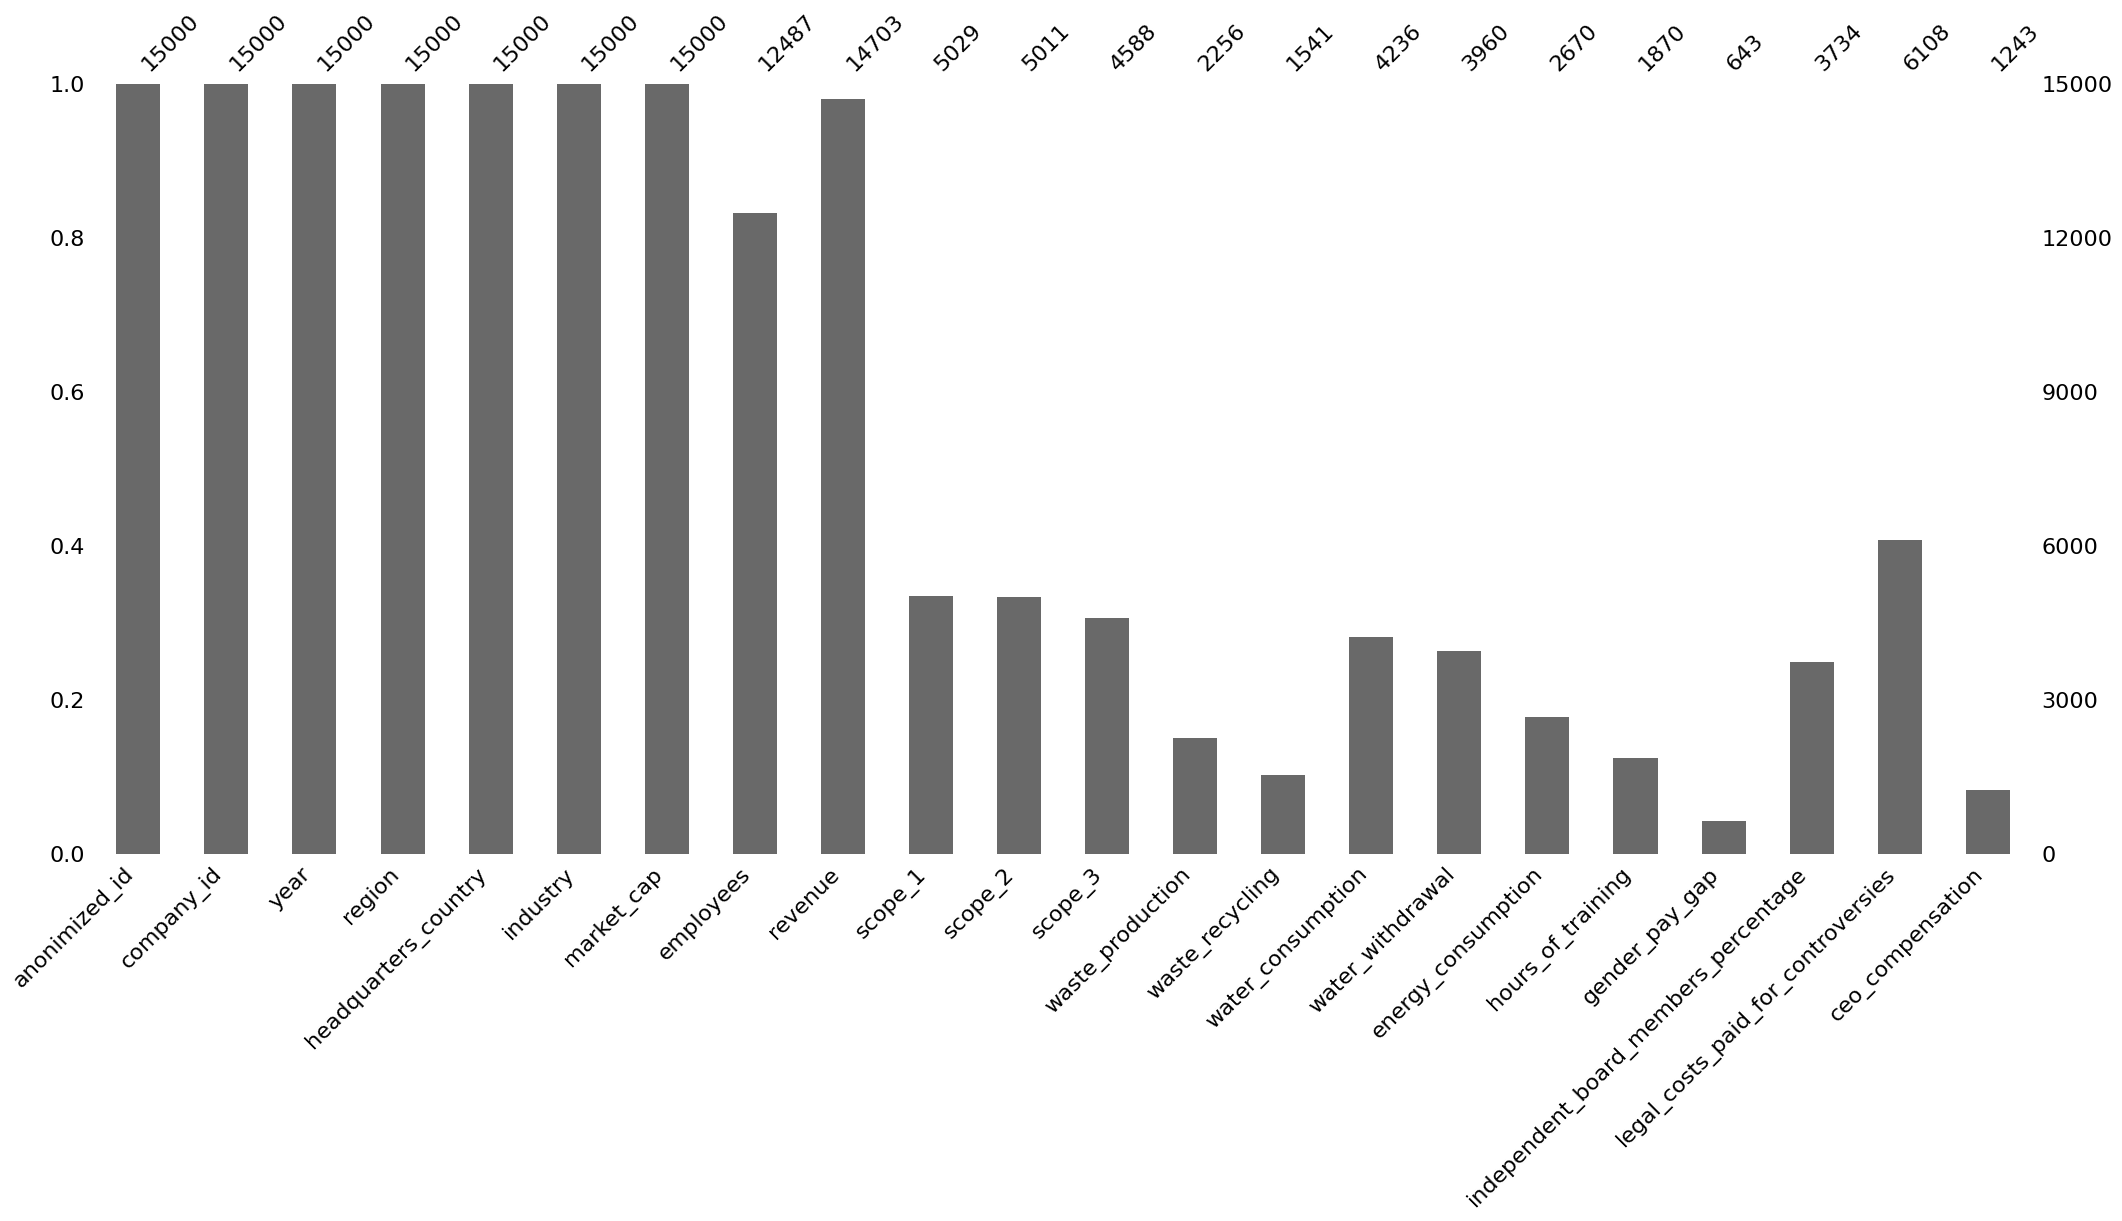

In [15]:
msno.bar(df_y_train)
plt.show()

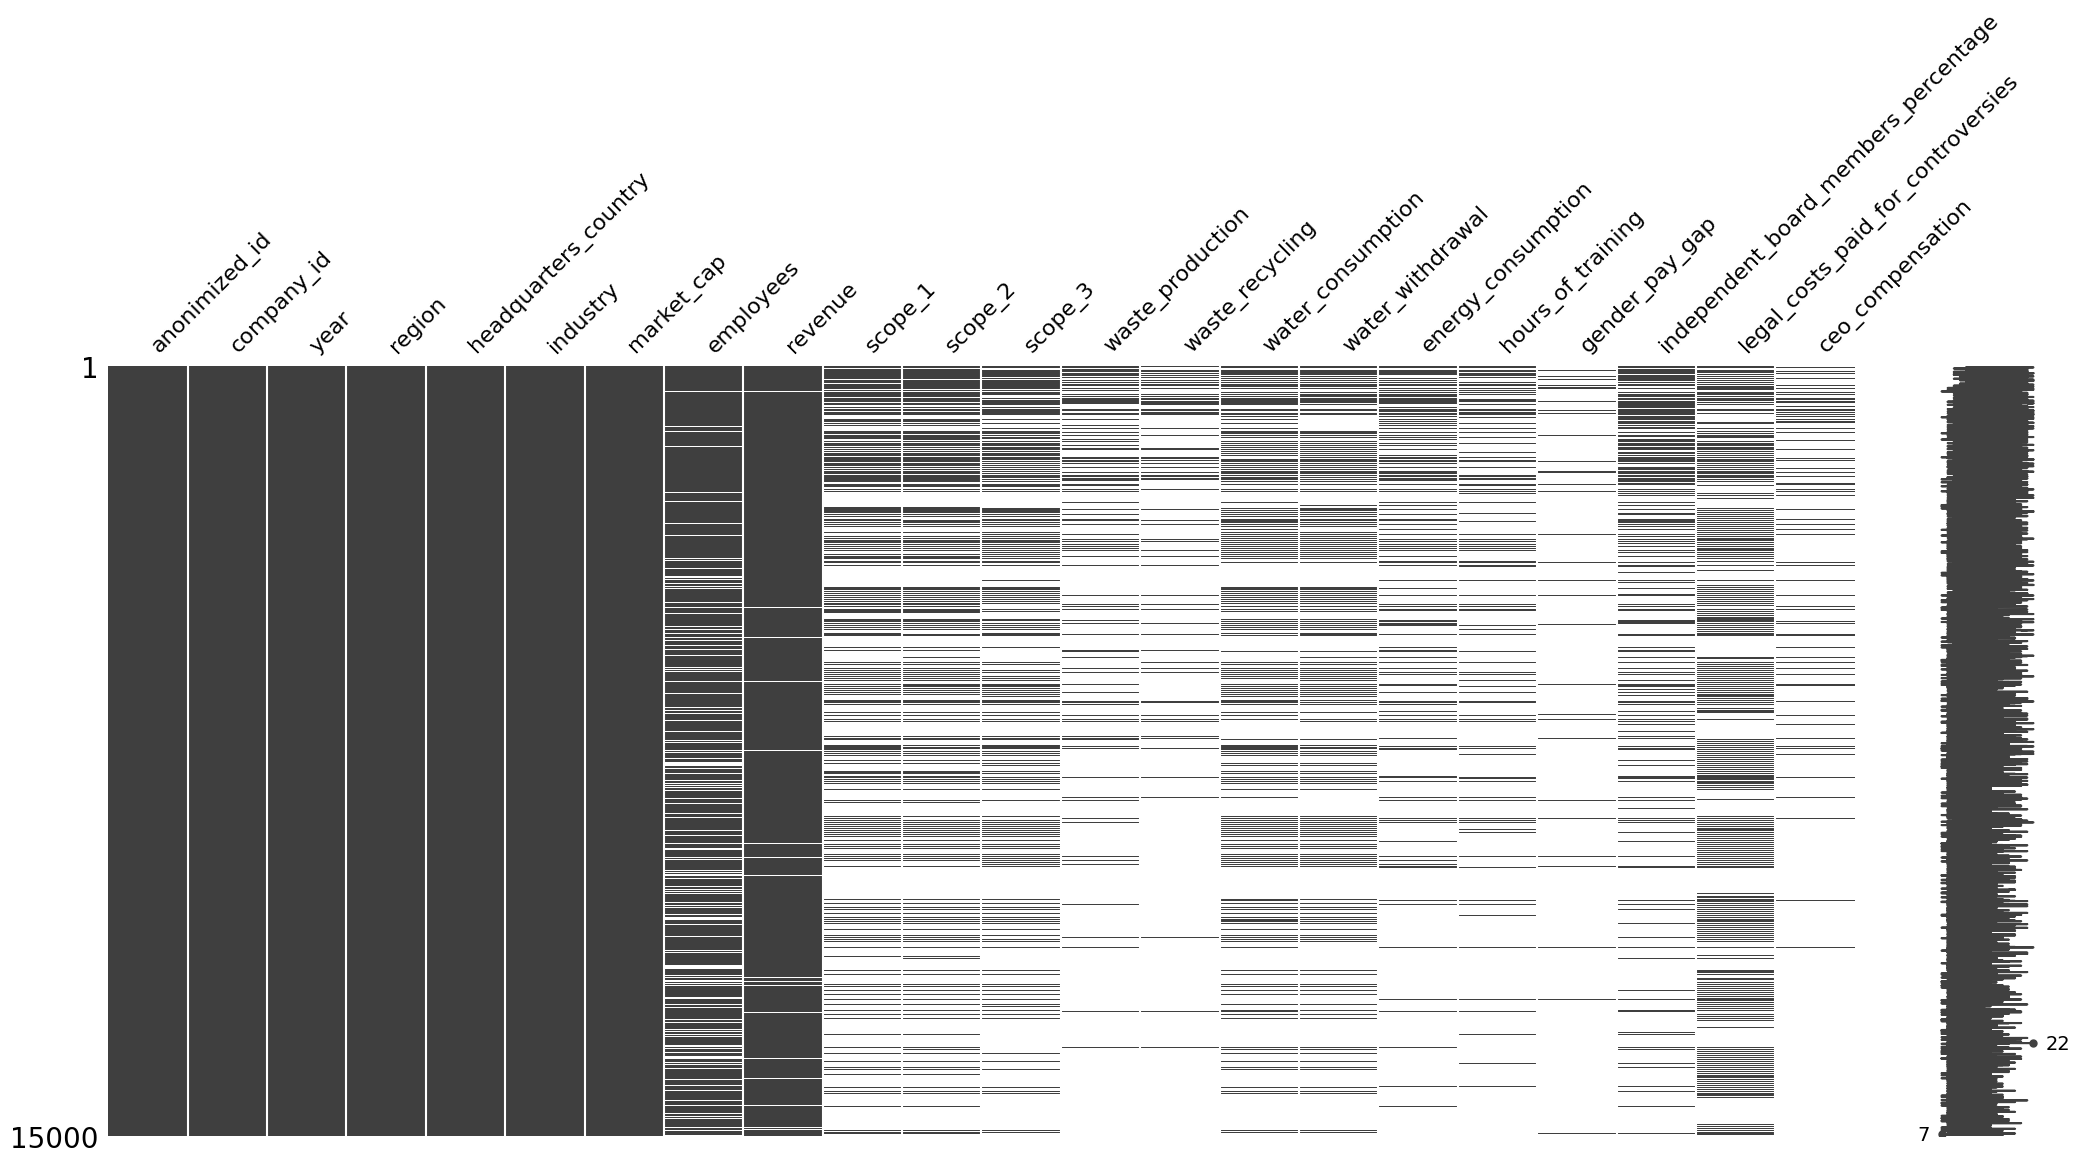

In [16]:
msno.matrix(df_y_train)
plt.show()

In [17]:
print(
    f"El número total de valores NaN en el archivo y_train es {df_y_train.isna().sum().sum()}"
)

El número total de valores NaN en el archivo y_train es 154921


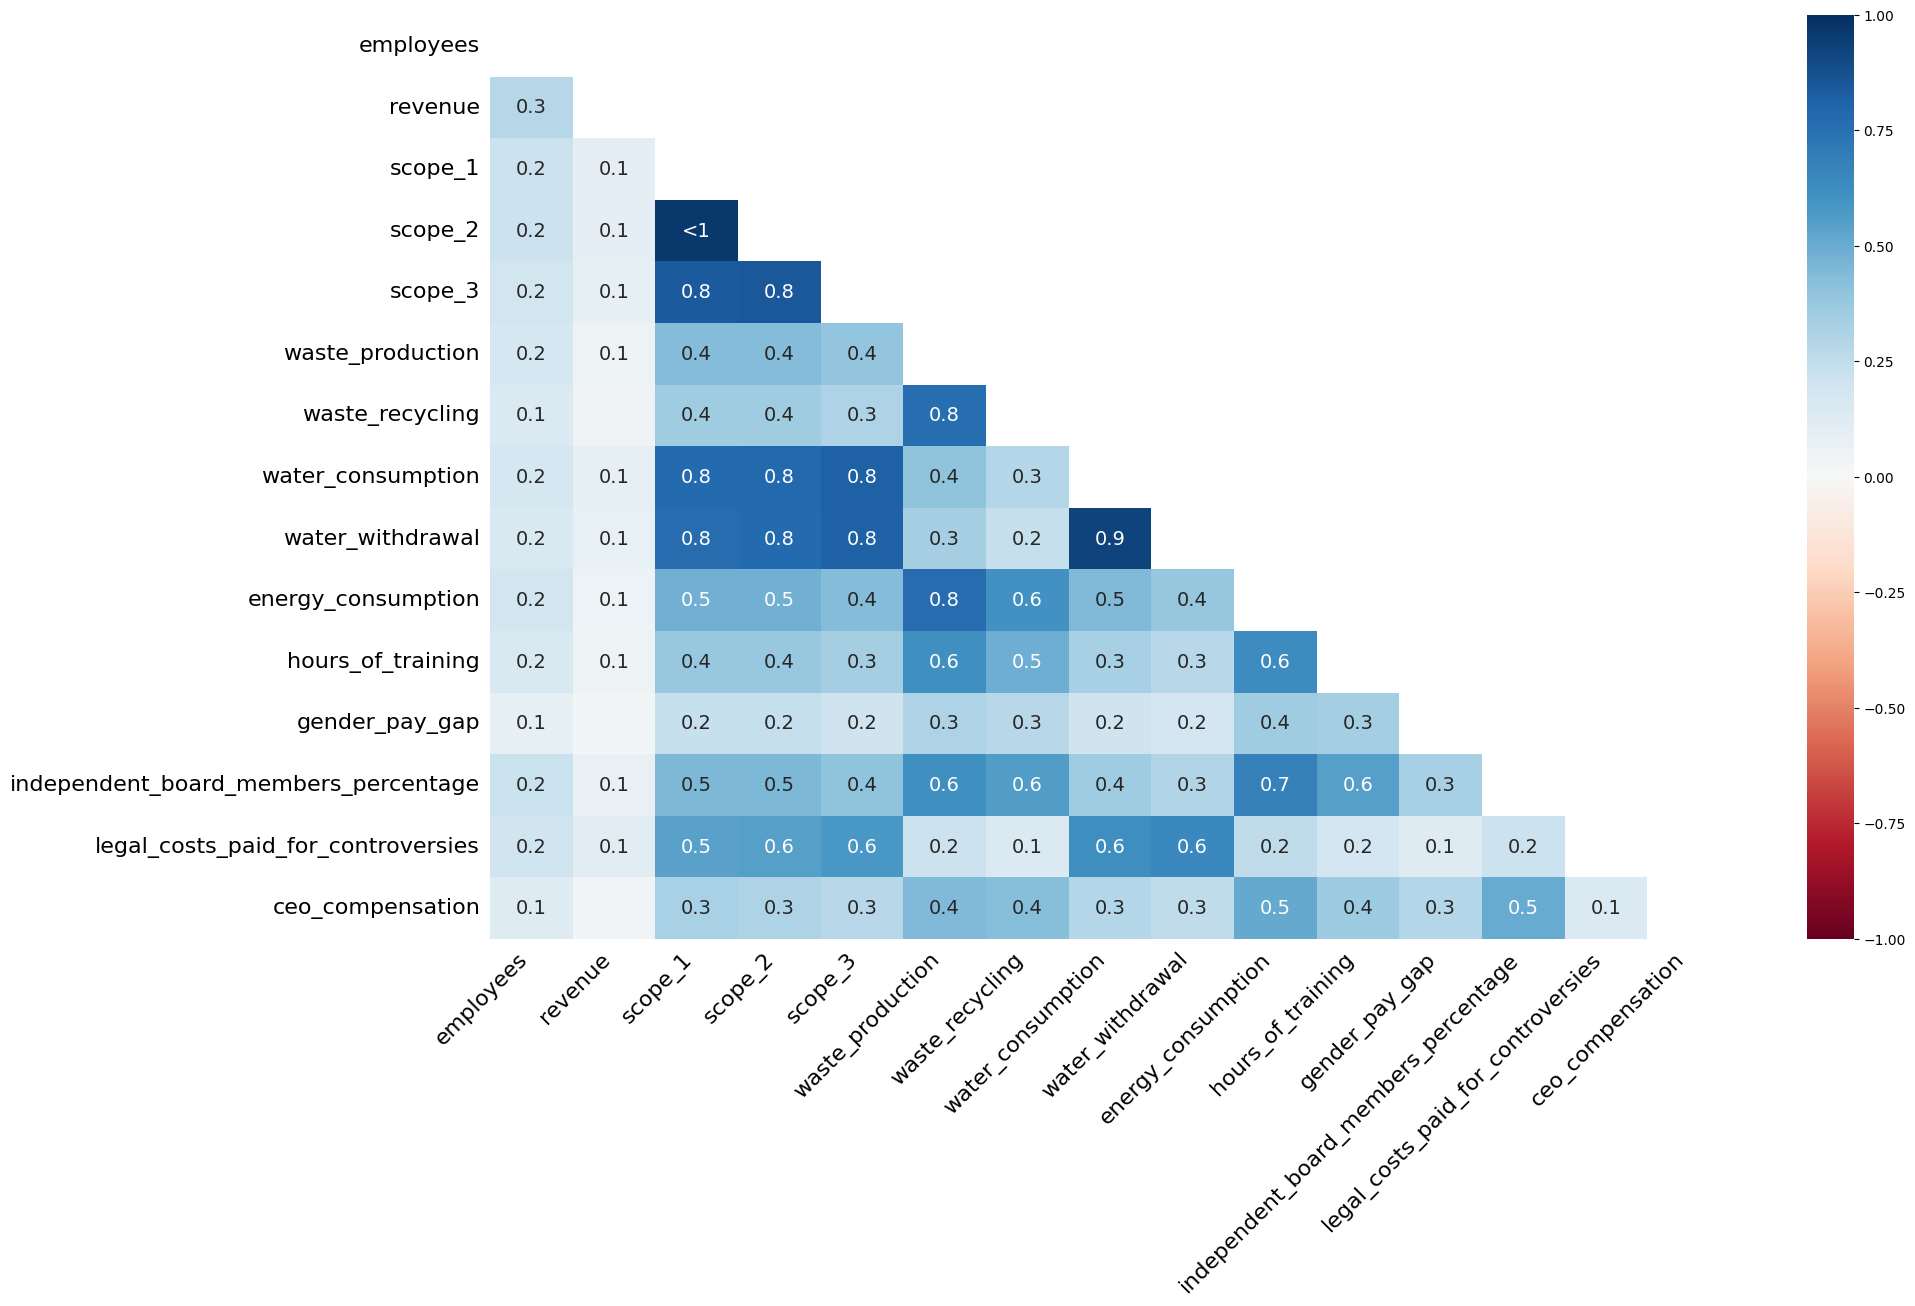

In [18]:
msno.heatmap(df_y_train)
plt.show()

La correlación de nulidad oscila entre -1 (si una variable aparece la otra definitivamente no) y 0 (las variables que aparecen o no aparecen no tienen ningún efecto entre sí) y 1 (si una variable aparece la otra definitivamente también).

Las variables que están siempre llenas o siempre vacías no tienen una correlación significativa, por lo que se eliminan silenciosamente de la visualización.

Las entradas marcadas con <1 o >-1 tienen una correlación que está cerca de ser exactamente negativa o positiva, pero que todavía no es perfecta. Esto apunta a un pequeño número de registros erróneos en el conjunto de datos. Podemos chequear, entonces, qué casos requerirán una atención especial.

El mapa de calor funciona muy bien para detectar relaciones de integridad de datos entre pares de variables, pero su poder explicativo es limitado cuando se trata de relaciones más amplias y no es especialmente adecuado para conjuntos de datos extremadamente grandes.

In [19]:
df_x_train = df_x_train.drop(columns=["Unnamed: 0"])

In [20]:
print("Numero de valores NaN por columna del archivo x_train:")
df_x_train.isna().sum()

Numero de valores NaN por columna del archivo x_train:


anonimized_id                               0
company_id                                  0
year                                        0
region                                      0
headquarters_country                        0
industry                                    0
market_cap                                  0
employees                                4386
revenue                                  2502
scope_1                                 10725
scope_2                                 10740
scope_3                                 11100
waste_production                        13082
waste_recycling                         13690
water_consumption                       11399
water_withdrawal                        11634
energy_consumption                      12730
hours_of_training                       13410
gender_pay_gap                          14457
independent_board_members_percentage    11826
legal_costs_paid_for_controversies       9808
ceo_compensation                  

In [21]:
print(
    f"El número total de valores NaN en el archivo x_train es: {df_x_train.isna().sum().sum()}"
)

El número total de valores NaN en el archivo x_train es: 165432


In [22]:
print(
    f"La diferencia de valores NaN entre el archivo x_train y y_train es: {df_x_train.isna().sum().sum() - df_y_train.isna().sum().sum()}"
)

La diferencia de valores NaN entre el archivo x_train y y_train es: 10511


### Estadística Descriptiva

In [23]:
columns = df_y_train.columns[7:]  # Columnas continuas (float64) de interés

In [24]:
columns

Index(['employees', 'revenue', 'scope_1', 'scope_2', 'scope_3',
       'waste_production', 'waste_recycling', 'water_consumption',
       'water_withdrawal', 'energy_consumption', 'hours_of_training',
       'gender_pay_gap', 'independent_board_members_percentage',
       'legal_costs_paid_for_controversies', 'ceo_compensation'],
      dtype='object')

In [25]:
df_y_train[columns].describe()

,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
count,12487.000,14703.000,5029.000,5011.000,4588.000,2256.000,1541.000,4236.000,3960.000,2670.000,1870.000,643.000,3734.000,6108.000,1243.000
mean,16160.774,4452.430,1628980.355,529082.105,15071623.843,7685791.646,193786.945,46437053.839,168140929.623,51680542.615,1061093.561,2.869,0.599,39.341,7284989.399
std,42612.668,15257.250,12571119.883,8165525.947,359203106.527,93885553.773,1187292.334,1246839286.343,2481247595.667,1612081181.154,5506664.838,6.587,0.264,311.673,10651592.646
min,1.000,-8257.940,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,-8.100,0.000,0.000,9768.000
25%,1500.000,300.665,1020.000,2935.560,2752.750,4089.000,2059.000,111671.688,220641.408,120908.472,14607.750,0.798,0.400,0.000,1665600.000
50%,4368.000,890.190,11817.000,23561.000,27260.000,28243.950,16647.000,604572.520,1174083.170,634069.000,150213.000,0.953,0.615,0.000,3806000.000
75%,12907.000,2960.310,118300.000,121323.500,308928.250,174086.000,94000.000,3787000.000,6663092.213,3453722.500,668202.000,1.000,0.833,4.322,9771571.500
max,969696.000,410650.320,339422881.805,339422881.805,16790000000.000,2461882000.000,24874600.000,57943900000.000,72000000000.000,81670056270.000,148295008.000,40.000,1.000,14830.200,211131206.000


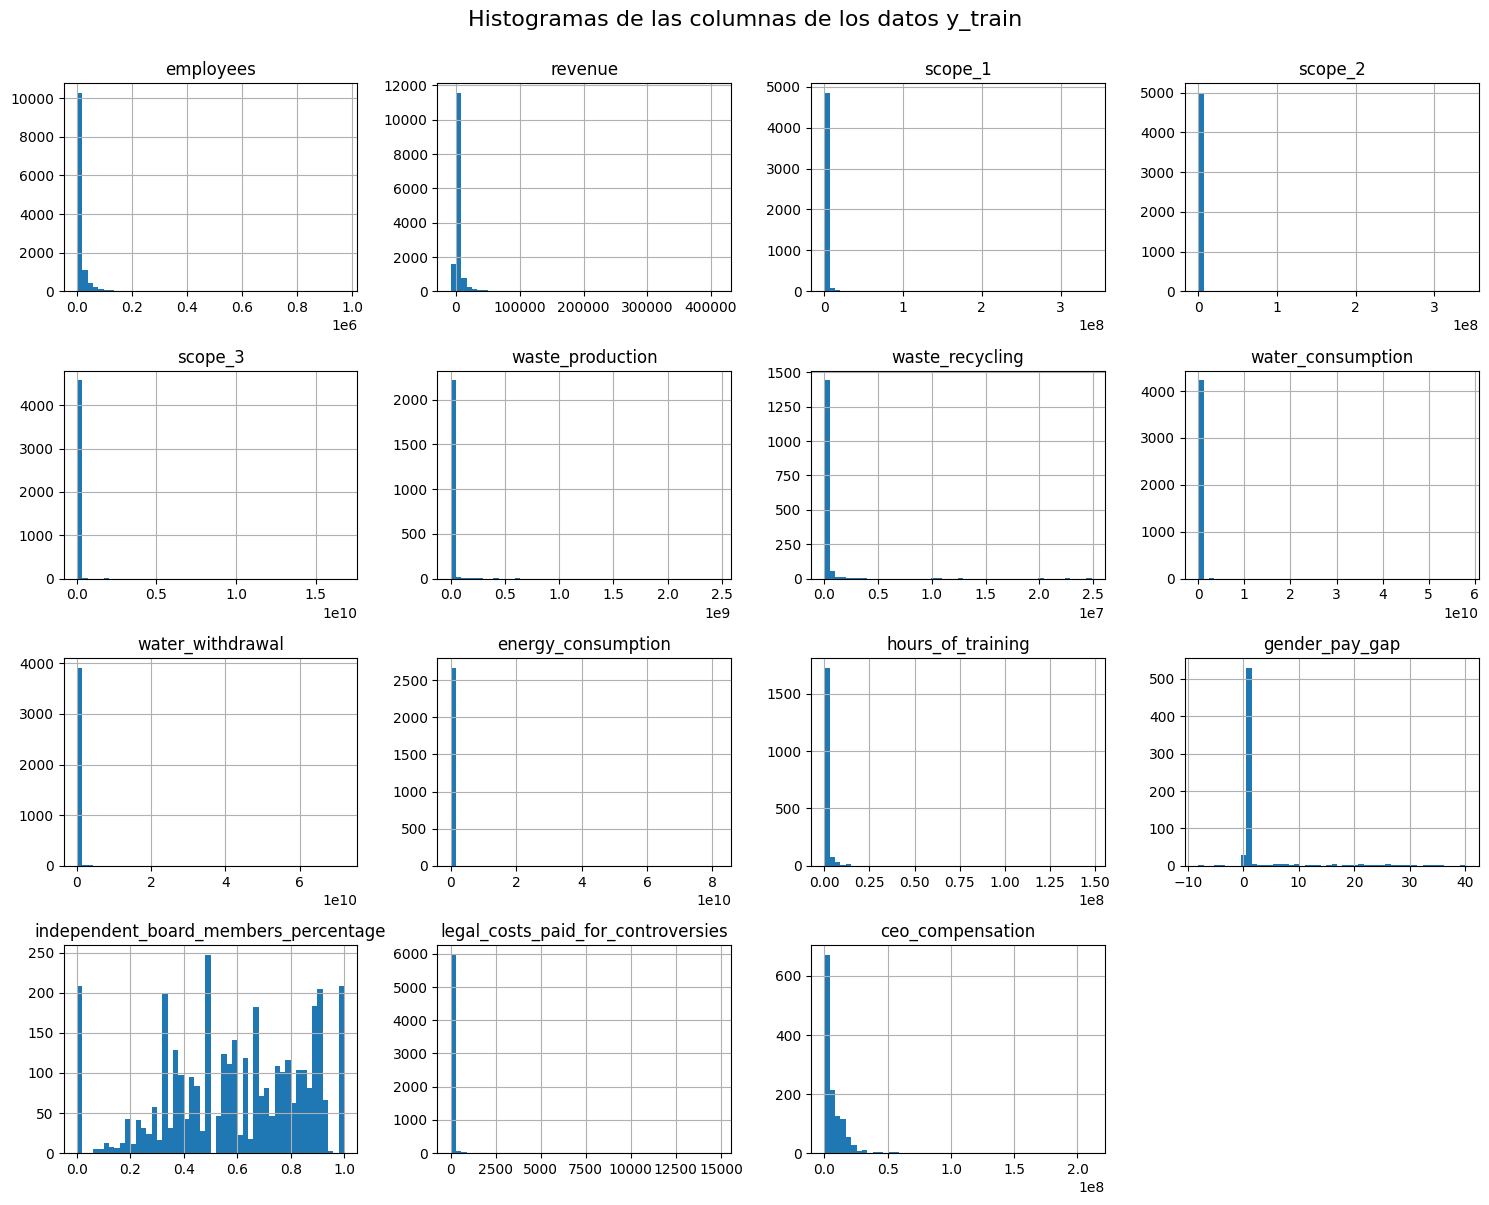

In [26]:
df_y_train[columns].hist(bins=50, figsize=(15, 12), layout=(4, 4))
plt.suptitle("Histogramas de las columnas de los datos y_train", y=1, fontsize=16)
plt.tight_layout()
plt.show()

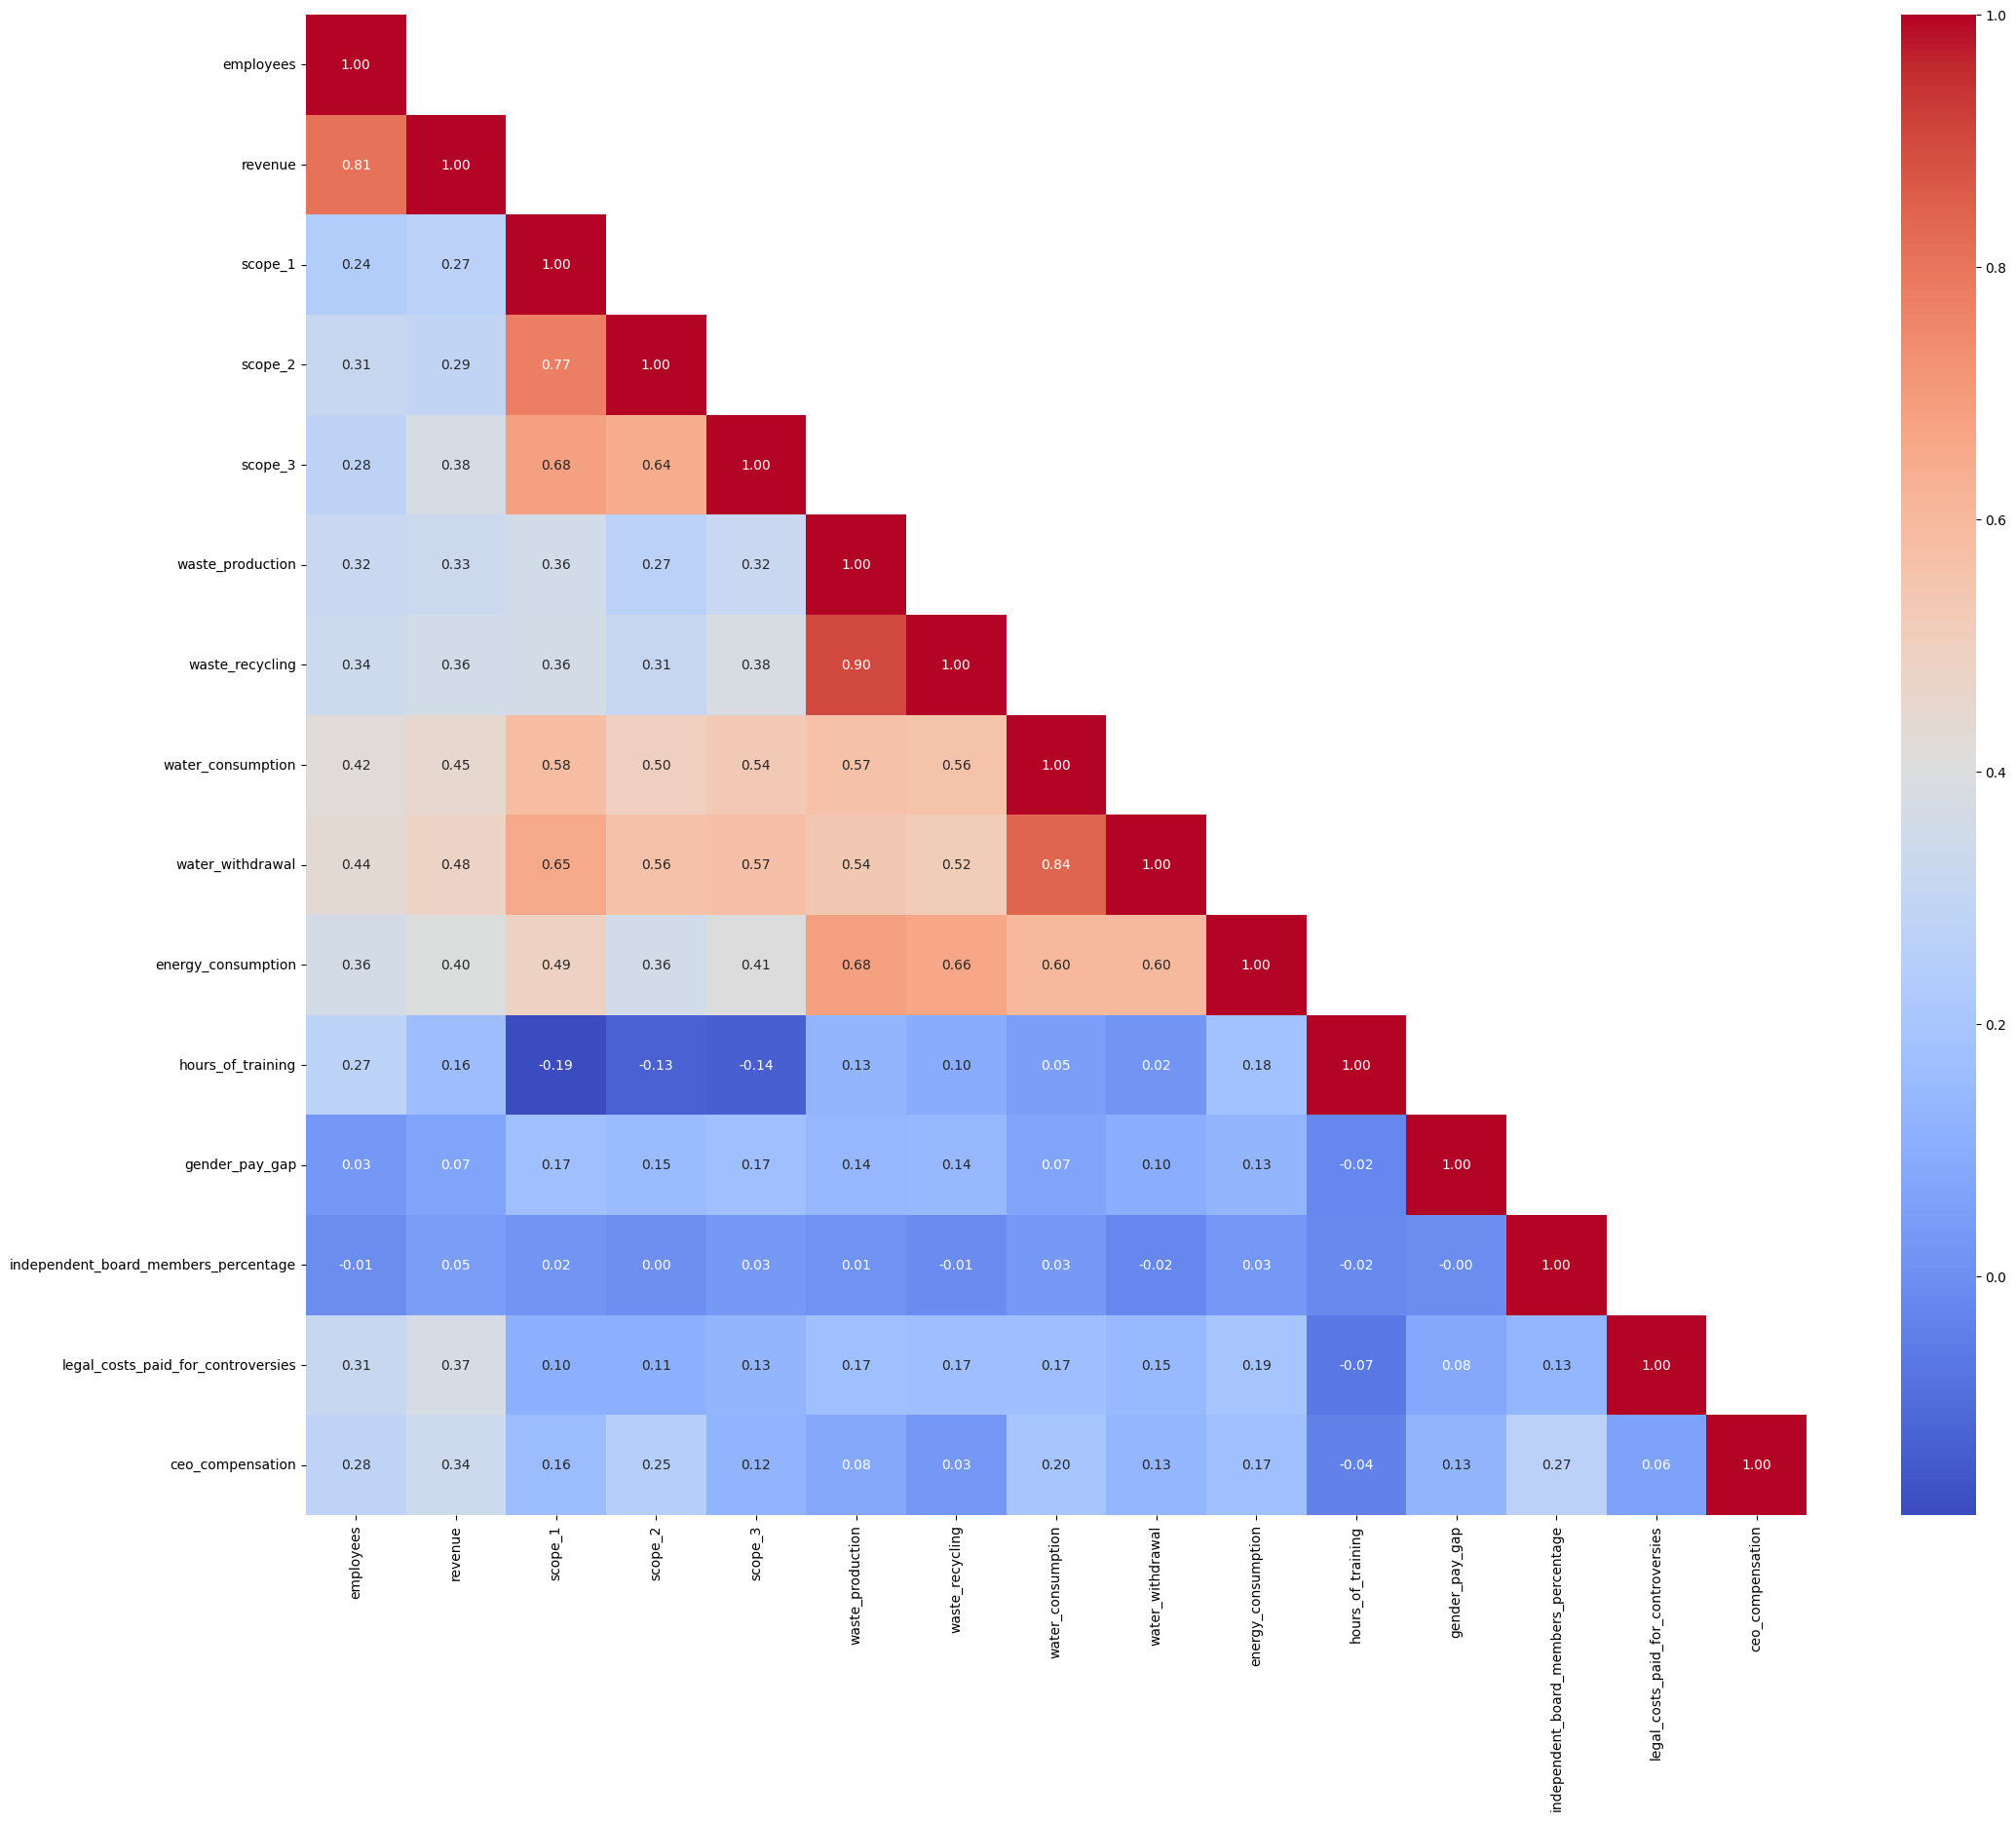

In [27]:
correlation(df_y_train[columns])

Tener en cuenta que la matrix de correlación entre características puede llevarnos a conclusiones erróneas debido a la abultada presencia de valores nulos.

## Preprocesamiento de Datos

In [28]:
columns_to_drop = df_y_train.columns[:7]
columns_to_drop

Index(['anonimized_id', 'company_id', 'year', 'region', 'headquarters_country',
       'industry', 'market_cap'],
      dtype='object')

In [29]:
x_train = df_x_train.drop(columns=columns_to_drop)
y_train = df_y_train.drop(columns=columns_to_drop)

### Imputación de Datos

Vale aquí hacer algunas aclariones:

* Si solamente faltan pocos datos, por ejemplo, menor al 10% podríamos eliminarlos sin perder mucha información y poder entrenar los modelos que veremos a continuación ya que PCA o el gradiente descendente no aceptan valores nulos.

* Si la cantidad de datos faltantes es abundante, ya necesitaríamos algun tipo de inputación de datos en funcion de las distribuciones ya existentes de las características. Por ejemplo si la dispersión de una característica es pequeña (es decir muy cercana al promedio) podríamos reemplazar los datos faltantes con el valores cercanos al mismo promedio (una desviación estandar).

* Existe la posibilidad de aproximar las distribuciones de las características a una distribución en particular, como por ejemplo Gaussiana con el promedio y la desviación estandar de los datos existentes. También se podrían utilizar otras distribuciones parametrizadas. En estos casos es recomendable hacer un test estadístico para verificar que la distribución elegida sea consistente con los datos existentes.

* En nuestro caso, usaremos una estrategia de imputación simple: En los lugares donde falten datos se imputará la mediana, aunque pueden elegirse otras estrategias.

* Tener en cuenta que la imputación de datos puede sesgar a los algoritmos **(IMPORANTE!)**

* Otra cuestión relevante es el tema de los outliers: si el dato por sí solo es un outlier en la realidad no podrá ser captado ni por PCA, ni por el autoencoder, pero si hay algún tipo de relación entre outliers y diferentes características, los outliers tendrían que poder ser detectados por el autoencoder.


In [30]:
# Imputation
imputer = SimpleImputer(
    strategy="median"
)  # You can choose a different strategy if needed

x_train_imputed = imputer.fit_transform(x_train)
y_train_imputed = imputer.fit_transform(y_train)

### Outliers

In [31]:
aux = pd.DataFrame(y_train_imputed)
z_scores = zscore(aux)
outlier_counts_per_column = {}

# Count outliers for each column
for column in aux.columns:
    outlier_indices = abs(z_scores[column]) > 3
    outlier_count = outlier_indices.sum()
    outlier_counts_per_column[column] = outlier_count

# Display the count of outlier values per column
print("Outliers por columna:")
print(outlier_counts_per_column)

# # Display the values that are considered outliers in each column
# for column in aux.columns:
#     column_outliers = outliers[column].dropna()
#     if not column_outliers.empty:
#         print(f"Outliers in column '{column}': {column_outliers.tolist()}")

Outliers por columna:
{0: 245, 1: 217, 2: 71, 3: 18, 4: 10, 5: 25, 6: 37, 7: 8, 8: 20, 9: 5, 10: 58, 11: 75, 12: 308, 13: 75, 14: 210}


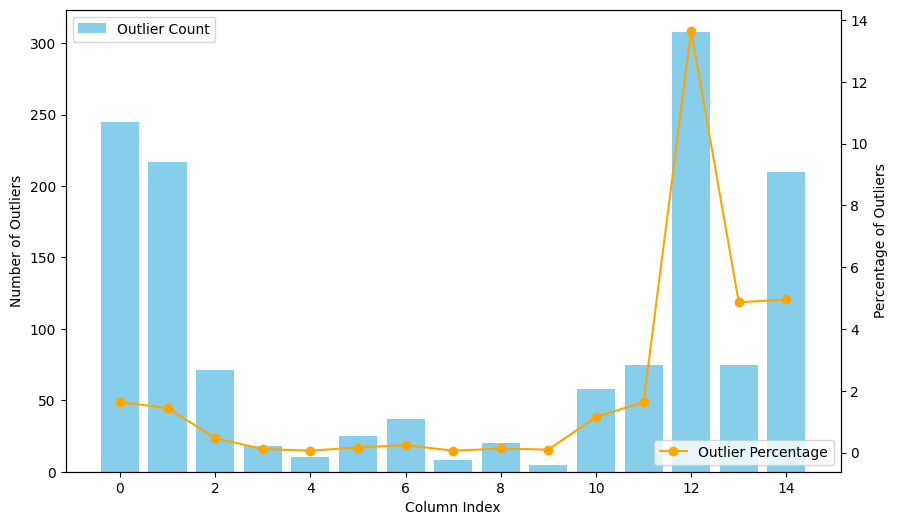

In [32]:
# Extracting keys and values from the dictionary
columns = list(outlier_counts_per_column.keys())
outlier_counts = list(outlier_counts_per_column.values())

# Calculating the percentage of outliers per column considering non-NaN values
outlier_percentages = [
    outlier_counts[i] / df_y_train.count().iloc[i] * 100 for i in range(len(columns))
]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting a bar chart
ax1.bar(columns, outlier_counts, color="skyblue", label="Outlier Count")
ax1.set_xlabel("Column Index")
ax1.set_ylabel("Number of Outliers")
ax1.legend(loc="upper left")


# Creating a second y-axis for outlier percentages
ax2 = ax1.twinx()
ax2.plot(
    columns, outlier_percentages, color="orange", marker="o", label="Outlier Percentage"
)
ax2.set_ylabel("Percentage of Outliers")
ax2.legend(loc="lower right")

plt.show()

### Escalado

Aunque el escalado no es imprescindible para el ACP, se recomienda encarecidamente en muchos casos. La razón es que el ACP se basa en la matriz de covarianza de las características, y la escala de éstas puede influir significativamente en los resultados.

He aquí algunos puntos clave a tener en cuenta:

* Impacto de la escala de las características: Las características con escalas más grandes contribuirán más a los componentes principales que las características con escalas más pequeñas. Esto puede dar lugar a una representación sesgada de los datos, en la que las variables con escalas mayores dominen los componentes principales.

* Contribución equitativa de las características: El escalado garantiza que todas las características contribuyan por igual a la matriz de varianza-covarianza, lo que permite al ACP centrarse en las direcciones con la varianza más significativa.

* Interpretabilidad de los componentes principales: Cuando las características están en diferentes escalas, los componentes principales pueden ser difíciles de interpretar, ya que las contribuciones de cada característica no son comparables.

* Estabilidad numérica: El escalado puede mejorar la estabilidad numérica del algoritmo PCA, especialmente si hay grandes diferencias en las magnitudes de las características.

Aunque ACP puede aplicarse técnicamente a datos sin escalar, a menudo se recomienda escalar los datos como una buena práctica. La implementación PCA de Scikit-learn (sklearn.decomposition.PCA) centra automáticamente los datos (restando la media) durante el proceso de ajuste, pero depende del usuario decidir si escalar adicionalmente las características.

Otro detalle importante es ver cuantos **valores negativos** hay en la tabla:

In [33]:
(y_train < 0).sum()

employees                                0
revenue                                 24
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                           5
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

Para el dataframe imputado con la mediana:

In [34]:
(pd.DataFrame(y_train_imputed) < 0).sum()

0      0
1     24
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     5
12     0
13     0
14     0
dtype: int64

No se imputan datos negativos demás, pero no deseamos que esos pocos valores negativos hagan un data leak sobre las demas columnas y obtengamos datos sin sentido, por lo tanto, trataremos de evitar esto con el escalado de los datos entre 0 y 1 con la clase MinMaxScaler.

In [35]:
std_scaler_ytrain = StandardScaler()
minmax_scaler_ytrain = MinMaxScaler()

In [36]:
y_train_std = std_scaler_ytrain.fit_transform(y_train_imputed)
y_train_minmax = minmax_scaler_ytrain.fit_transform(y_train_std)

## Análisis de componentes principales

In [37]:
pca = PCA()
pca.fit_transform(y_train_minmax)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

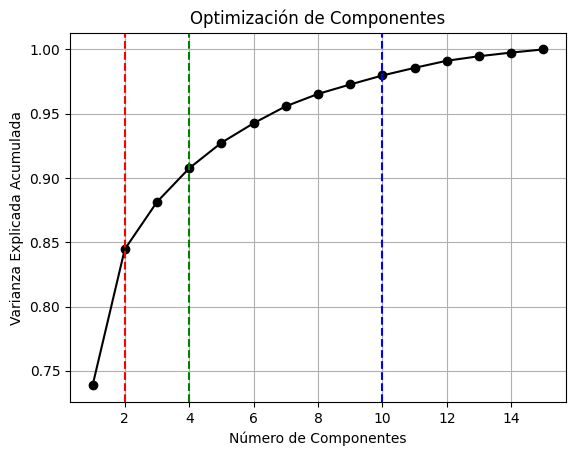

In [38]:
# Plot the cumulative explained variance
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
    color="black",
)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Optimización de Componentes")
plt.grid(True)

# Add vertical dashed lines
plt.axvline(x=2, color="r", linestyle="--", label="Line at 2")
plt.axvline(x=4, color="g", linestyle="--", label="Line at 3")
plt.axvline(x=10, color="b", linestyle="--", label="Line at 4")
plt.show()

Podemos apreciar tres puntos importantes en este gráfico:

* Con **2** componentes principales explicamos casi el 85% de la varianza

* Con **4** componentes principales explicamos mas del 90% de la Varianza

* Con **10** componentes principales explicamos cerca del 97% de la Varianza

### Procedimiento

In [39]:
# Choose the optimal number of components based on the plot
optimal_components = 2

In [40]:
pca = PCA(
    n_components=optimal_components
)  # Apply PCA with the optimal number of components

In [41]:
y_train_pca_values = pca.fit_transform(y_train_minmax) # Apply PCA

In [42]:
y_train_pca = pca.inverse_transform(y_train_pca_values)  # PCA inversion

In [43]:
y_train_pca = minmax_scaler_ytrain.inverse_transform(y_train_pca)  # MinMax inversion

In [44]:
y_train_pca = std_scaler_ytrain.inverse_transform(y_train_pca)  # Std inversion

In [45]:
y_train_pca = pd.DataFrame(y_train_pca, columns=y_train.columns) # Convert to Dataframe

In [46]:
y_train_filled_pca = y_train.fillna(y_train_pca) # Retaining true data and filling original NaN values

In [47]:
(y_train_filled_pca < 0).sum()

employees                                  0
revenue                                   47
scope_1                                 3034
scope_2                                 6581
scope_3                                  347
waste_production                        5978
waste_recycling                            0
water_consumption                        565
water_withdrawal                         381
energy_consumption                       536
hours_of_training                          0
gender_pay_gap                             5
independent_board_members_percentage       0
legal_costs_paid_for_controversies       183
ceo_compensation                           0
dtype: int64

Observemos que PCA arroja valores negativos en columnas como por ejemplo 'employees', lo cual no tiene sentido. Por lo tanto, una posible estrategia sería restarle el promedio lo cual seguramente acomode la mayoría de los valores, pero los outliers problablemente sigan siendo negativos

Hacemos lo mismo para el archivo x_train con la matrix de transformación ya obtenida por el PCA anterior, para después poder comparar la métrica:

In [48]:
x_train_imputed = imputer.fit_transform(x_train)  # Median imputing
std_scaler_xtrain = StandardScaler()
minmax_scaler_xtrain = MinMaxScaler()
x_train_std = std_scaler_xtrain.fit_transform(x_train_imputed)  # MinMax Scaling
x_train_minmax = minmax_scaler_xtrain.fit_transform(x_train_std)  # Standard Scaling
x_train_pca_values = pca.transform(x_train_minmax)  # Apply trained PCA
x_train_pca = pca.inverse_transform(x_train_pca_values)
x_train_pca = minmax_scaler_xtrain.inverse_transform(x_train_pca)
x_train_pca = std_scaler_xtrain.inverse_transform(x_train_pca)
x_train_pca = pd.DataFrame(x_train_pca, columns=x_train.columns)
x_train_filled_pca = x_train.fillna(x_train_pca)

In [49]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, x_train_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final = np.mean(nrmse_values_pca)

In [50]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.001919572076181209


### Testing PCA

In [51]:
df_x_test = pd.read_csv("./Data/x_test.csv")

In [52]:
x_test = df_x_test.drop(columns="Unnamed: 0")

In [53]:
x_test = x_test.drop(columns=columns_to_drop)

In [54]:
x_test_imputed = imputer.fit_transform(x_test)
std_scaler_xtest = StandardScaler()
minmax_scaler_xtest = MinMaxScaler()
x_test_std = std_scaler_xtest.fit_transform(x_test_imputed)
x_test_minmax = minmax_scaler_xtest.fit_transform(x_test_std)
x_test_pca_values = pca.transform(x_test_minmax)
x_test_pca = pca.inverse_transform(x_test_pca_values)
x_test_pca = minmax_scaler_xtest.inverse_transform(x_test_pca)
x_test_pca = std_scaler_xtest.inverse_transform(x_test_pca)
x_test_pca = pd.DataFrame(x_test_pca, columns=x_test.columns)
x_test_filled_pca = x_test.fillna(x_test_pca)

In [55]:
y_test_pca = pd.concat(
    [
        df_x_test[
            [
                "anonimized_id",
                "company_id",
                "year",
                "region",
                "headquarters_country",
                "industry",
                "market_cap"
            ]
        ],
        x_test_filled_pca,
    ],
    axis=1,
)

In [56]:
y_test_pca.to_csv("./Data/y_test_pca.csv", index=True)

Your submission score is : **0.3796185678052731**

In [57]:
(x_test_filled_pca < 0).sum()

employees                                4074
revenue                                    15
scope_1                                 10070
scope_2                                 10119
scope_3                                  9807
waste_production                        11987
waste_recycling                         10938
water_consumption                         671
water_withdrawal                        10162
energy_consumption                        666
hours_of_training                       10184
gender_pay_gap                              3
independent_board_members_percentage        0
legal_costs_paid_for_controversies       7706
ceo_compensation                            0
dtype: int64

## Arquitectura Autoencoder

Aunque el aprendizaje profundo ha recibido mucha atención y se ha aplicado a varios problemas de inteligencia artificial en los últimos años, su investigación con fines de imputación sigue siendo un tema poco estudiado. 

Entre los enfoques de aprendizaje profundo para imputación, el Autoencoder (AE) y sus variantes (p. ej. Denoising y Variational) han llamado la atención de la comunidad investigadora debido a sus propiedades en lo que se refiere a la capacidad de de aprender a partir de datos corruptos, lo que constituye una extensión natural al campo de los datos ausentes (Nelwamondo et al., 2007; S'anchez-Morales et al., 2019; Costa et al., 2018; Gondara y Wang, 2018). 

Este tipo de redes neuronales aprenden una representación de los datos a partir de la capa de entrada e intenta reproducirla en la capa de salida. Al hacer esto, el modelo es capaz de aprender a partir de datos incompletos y generar nuevos valores plausibles para la imputación.

In [58]:
BATCH_SIZE = 128  # Adjust this value based on your GPU memory, always try to use powers of 2 (i.e. 2, 4, 8, 16...)

In [59]:
# Convert DataFrame to PyTorch tensor
y_train_minmax = minmax_scaler_ytrain.fit_transform(y_train_imputed)
x_train_minmax = minmax_scaler_xtrain.fit_transform(x_train_imputed)
x_train_tensor = torch.tensor(x_train_minmax, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_minmax, dtype=torch.float32)

# Define the ratio for splitting between training and validation sets
validation_ratio = 0.1

# Calculate the size of the validation set
validation_size = int(validation_ratio * len(x_train_tensor))
training_size = len(x_train_tensor) - validation_size

# Use random_split to create training and validation datasets
train_dataset, val_dataset = random_split(
    dataset=TensorDataset(y_train_tensor), lengths=[training_size, validation_size]
)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False) #Generally do not shuffle validation data

### Linear Autoencoder

In [60]:
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [61]:
# Set input and hidden size based on your data
input_size = x_train_minmax.shape[1]
hidden_size = input_size // 8

In [62]:
# Instantiate the model
model_ae = Autoencoder(input_size, hidden_size)
dev = "cuda" if device == "cuda:0" else "cpu"
summary(model_ae.to(device), (input_size,), batch_size=BATCH_SIZE, device=dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 1]              16
            Linear-2                  [128, 15]              30
Total params: 46
Trainable params: 46
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [63]:
def train_eval(model, loader, optimizer, loss_func):
    total_loss_train = []
    total_loss_val = []

    # Model in training mode:
    if model.training:
        for batch_idx, data in tqdm(
            enumerate(loader), desc="Epoch_Train", total=len(loader)
        ):
            optimizer.zero_grad(set_to_none=True)

            # Forward pass
            input_data = data[0].to(device)
            output = model(input_data)
            loss_train = loss_func(output, input_data)

            # Check for NaN in loss
            if np.isnan(loss_train.item()):
                print("NaN loss value detected. Aborting training.")
                break

            # Backward pass and optimization
            loss_train.backward()
            optimizer.step()
            total_loss_train.append(loss_train.item())

        return total_loss_train

    # Model in evaluation mode:
    elif not model.training:
        for batch_idx, data in tqdm(
            enumerate(loader), desc="Epoch_Val", total=len(loader)
        ):
            input_data = data[0].to(device)
            outputs = model(input_data)
            loss_val = loss_func(outputs, input_data)
            total_loss_val.append(loss_val.item())
        return total_loss_val


def calc_loss(loss_list, total_loss):
    loss_list.append(sum(total_loss) / len(total_loss))
    return loss_list

In [64]:
# Hiperparámetros
EPOCHS = 100
LR = 0.0001

In [65]:
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model_ae.parameters(), lr=LR)

In [66]:
# Reset model parameters
def reset_model_parameters(model):
    for layer in model.children():
        if hasattr(layer, "reset_parameters"):
            layer.reset_parameters()

In [67]:
reset_model_parameters(model_ae)

In [68]:
%%time

torch.cuda.empty_cache()

# Lists
loss_list_train = []
loss_list_val = []

# Training and Evaluation
for epoch in range(EPOCHS):
    # Train Iterations
    model = model_ae.train()
    total_loss_train = train_eval(model_ae, train_loader, optimizer, loss)

    # Val Iterations
    model = model.eval()
    with torch.no_grad():
        total_loss_val = train_eval(model_ae, val_loader, optimizer, loss)

    # Calc Loss
    loss_list_train = calc_loss(loss_list_train, total_loss_train)
    loss_list_val = calc_loss(loss_list_val, total_loss_val)

    # Printing Metrics per Epoch
    print(
        f"Training [{100.0 *(epoch+1)/EPOCHS:.0f}%]\t\tTrain Loss:{loss_list_train[-1]:.4f}  Val Loss:{loss_list_val[-1]:.4f}\n"
    )

Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [1%]		Train Loss:0.3545  Val Loss:0.3454



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [2%]		Train Loss:0.3369  Val Loss:0.3286



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [3%]		Train Loss:0.3209  Val Loss:0.3133



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [4%]		Train Loss:0.3062  Val Loss:0.2992



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [5%]		Train Loss:0.2926  Val Loss:0.2860



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [6%]		Train Loss:0.2799  Val Loss:0.2738



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [7%]		Train Loss:0.2681  Val Loss:0.2624



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [8%]		Train Loss:0.2570  Val Loss:0.2516



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [9%]		Train Loss:0.2465  Val Loss:0.2414



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [10%]		Train Loss:0.2366  Val Loss:0.2318



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [11%]		Train Loss:0.2272  Val Loss:0.2226



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [12%]		Train Loss:0.2182  Val Loss:0.2139



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [13%]		Train Loss:0.2097  Val Loss:0.2055



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [14%]		Train Loss:0.2015  Val Loss:0.1975



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [15%]		Train Loss:0.1936  Val Loss:0.1898



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [16%]		Train Loss:0.1860  Val Loss:0.1823



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [17%]		Train Loss:0.1787  Val Loss:0.1751



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [18%]		Train Loss:0.1716  Val Loss:0.1681



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [19%]		Train Loss:0.1647  Val Loss:0.1614



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [20%]		Train Loss:0.1581  Val Loss:0.1548



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [21%]		Train Loss:0.1516  Val Loss:0.1484



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [22%]		Train Loss:0.1453  Val Loss:0.1422



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [23%]		Train Loss:0.1391  Val Loss:0.1361



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [24%]		Train Loss:0.1332  Val Loss:0.1302



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [25%]		Train Loss:0.1273  Val Loss:0.1245



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [26%]		Train Loss:0.1217  Val Loss:0.1189



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [27%]		Train Loss:0.1162  Val Loss:0.1134



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [28%]		Train Loss:0.1108  Val Loss:0.1081



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [29%]		Train Loss:0.1056  Val Loss:0.1030



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [30%]		Train Loss:0.1005  Val Loss:0.0980



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [31%]		Train Loss:0.0956  Val Loss:0.0931



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [32%]		Train Loss:0.0908  Val Loss:0.0884



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [33%]		Train Loss:0.0861  Val Loss:0.0839



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [34%]		Train Loss:0.0817  Val Loss:0.0794



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [35%]		Train Loss:0.0773  Val Loss:0.0752



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [36%]		Train Loss:0.0731  Val Loss:0.0711



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [37%]		Train Loss:0.0691  Val Loss:0.0671



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [38%]		Train Loss:0.0652  Val Loss:0.0633



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [39%]		Train Loss:0.0614  Val Loss:0.0596



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [40%]		Train Loss:0.0578  Val Loss:0.0560



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [41%]		Train Loss:0.0543  Val Loss:0.0526



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [42%]		Train Loss:0.0510  Val Loss:0.0494



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [43%]		Train Loss:0.0478  Val Loss:0.0463



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [44%]		Train Loss:0.0448  Val Loss:0.0433



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [45%]		Train Loss:0.0419  Val Loss:0.0405



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [46%]		Train Loss:0.0391  Val Loss:0.0378



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [47%]		Train Loss:0.0365  Val Loss:0.0352



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [48%]		Train Loss:0.0340  Val Loss:0.0328



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [49%]		Train Loss:0.0316  Val Loss:0.0304



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [50%]		Train Loss:0.0293  Val Loss:0.0282



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [51%]		Train Loss:0.0272  Val Loss:0.0262



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [52%]		Train Loss:0.0252  Val Loss:0.0242



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [53%]		Train Loss:0.0233  Val Loss:0.0224



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [54%]		Train Loss:0.0215  Val Loss:0.0206



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [55%]		Train Loss:0.0198  Val Loss:0.0190



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [56%]		Train Loss:0.0182  Val Loss:0.0174



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [57%]		Train Loss:0.0167  Val Loss:0.0160



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [58%]		Train Loss:0.0153  Val Loss:0.0146



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [59%]		Train Loss:0.0140  Val Loss:0.0134



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [60%]		Train Loss:0.0128  Val Loss:0.0122



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [61%]		Train Loss:0.0117  Val Loss:0.0111



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [62%]		Train Loss:0.0107  Val Loss:0.0101



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [63%]		Train Loss:0.0097  Val Loss:0.0092



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [64%]		Train Loss:0.0088  Val Loss:0.0084



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [65%]		Train Loss:0.0080  Val Loss:0.0076



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [66%]		Train Loss:0.0073  Val Loss:0.0069



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [67%]		Train Loss:0.0066  Val Loss:0.0062



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [68%]		Train Loss:0.0059  Val Loss:0.0056



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [69%]		Train Loss:0.0054  Val Loss:0.0051



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [70%]		Train Loss:0.0049  Val Loss:0.0046



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [71%]		Train Loss:0.0044  Val Loss:0.0042



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [72%]		Train Loss:0.0040  Val Loss:0.0038



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [73%]		Train Loss:0.0036  Val Loss:0.0035



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [74%]		Train Loss:0.0033  Val Loss:0.0031



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [75%]		Train Loss:0.0030  Val Loss:0.0029



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [76%]		Train Loss:0.0028  Val Loss:0.0026



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [77%]		Train Loss:0.0025  Val Loss:0.0024



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [78%]		Train Loss:0.0023  Val Loss:0.0022



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [79%]		Train Loss:0.0022  Val Loss:0.0021



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [80%]		Train Loss:0.0020  Val Loss:0.0019



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [81%]		Train Loss:0.0019  Val Loss:0.0018



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [82%]		Train Loss:0.0018  Val Loss:0.0017



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [83%]		Train Loss:0.0017  Val Loss:0.0016



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [84%]		Train Loss:0.0016  Val Loss:0.0016



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [85%]		Train Loss:0.0016  Val Loss:0.0015



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [86%]		Train Loss:0.0015  Val Loss:0.0015



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [87%]		Train Loss:0.0015  Val Loss:0.0014



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [88%]		Train Loss:0.0014  Val Loss:0.0014



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [89%]		Train Loss:0.0014  Val Loss:0.0014



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [90%]		Train Loss:0.0014  Val Loss:0.0014



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [91%]		Train Loss:0.0014  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [92%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [93%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [94%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [95%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [96%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [97%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [98%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [99%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [100%]		Train Loss:0.0013  Val Loss:0.0013

CPU times: user 24.7 s, sys: 479 ms, total: 25.1 s
Wall time: 25.4 s


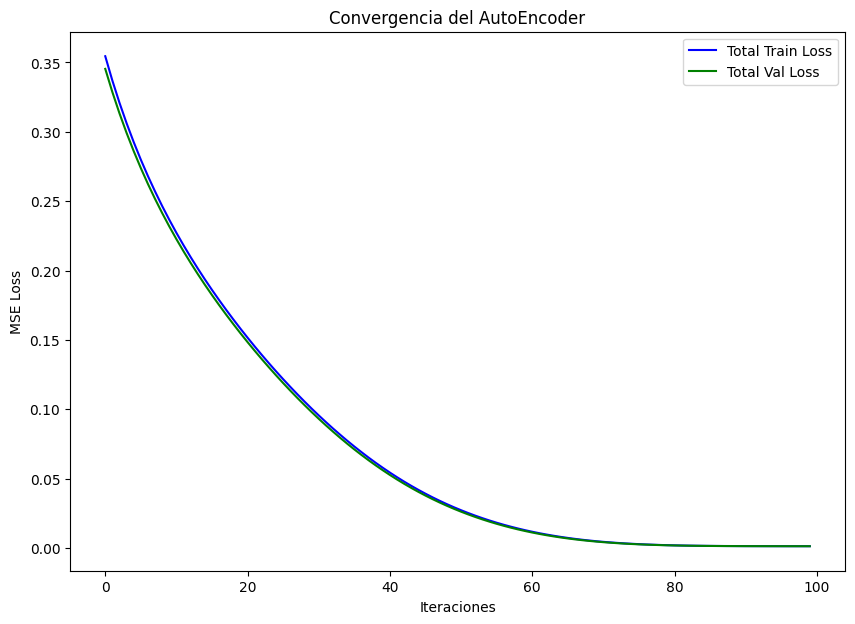

In [69]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(loss_list_train, "b", label="Total Train Loss")
ax1.plot(loss_list_val, "g", label="Total Val Loss")
plt.title("Convergencia del AutoEncoder", color="black")
ax1.set_xlabel("Iteraciones")
ax1.set_ylabel("MSE Loss", color="black")
ax1.legend(loc="upper right")
plt.show()

In [70]:
# Use the trained Autoencoder to fill missing values
model_ae.eval()
with torch.no_grad():
    filled_data_y = model_ae(y_train_tensor.to(device))
    filled_data_x = model_ae(x_train_tensor.to(device))

filled_data_y = minmax_scaler_ytrain.inverse_transform(filled_data_y.cpu().numpy())
filled_data_x = minmax_scaler_xtrain.inverse_transform(filled_data_x.cpu().numpy())

y_train_ae = pd.DataFrame(filled_data_y, columns=y_train.columns)
y_train_filled_ae = y_train.fillna(y_train_ae)
x_train_ae = pd.DataFrame(filled_data_x, columns=x_train.columns)
x_train_filled_ae = x_train.fillna(x_train_ae)

In [71]:
nrmse_values_ae = []

for column in y_train.columns:
    mrmse_col = normalized_mrse(y_train_filled_ae[column], x_train_filled_ae[column])
    nrmse_values_ae.append(nrmse_col)

score_final = np.mean(nrmse_values_ae)

In [72]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.001919572076181209


#### Testing LAE

In [73]:
# Convert DataFrame to PyTorch tensor
x_test_minmax = minmax_scaler_xtest.fit_transform(x_test_imputed)
x_test_tensor = torch.tensor(x_test_minmax, dtype=torch.float32)

In [74]:
# Use the trained Autoencoder to fill missing values
model_ae.eval()
with torch.no_grad():
    filled_data = model_ae(x_test_tensor.to(device))

filled_data = minmax_scaler_xtest.inverse_transform(filled_data.cpu().numpy())

x_test_ae = pd.DataFrame(filled_data, columns=x_test.columns)
x_test_filled_ae = x_test.fillna(x_test_ae)
y_test_ae = pd.concat(
    [
        df_x_test[
            [
                "anonimized_id",
                "company_id",
                "year",
                "region",
                "headquarters_country",
                "industry",
                "market_cap"
            ]
        ],
        x_test_filled_ae,
    ],
    axis=1,
)

In [75]:
y_test_ae.to_csv("./Data/y_test_ae.csv", index=True)

In [76]:
(x_test_filled_ae < 0).sum()

employees                                  42
revenue                                    42
scope_1                                 10255
scope_2                                 10203
scope_3                                 10485
waste_production                          695
waste_recycling                         12645
water_consumption                         657
water_withdrawal                          692
energy_consumption                      12070
hours_of_training                         815
gender_pay_gap                              3
independent_board_members_percentage        0
legal_costs_paid_for_controversies        540
ceo_compensation                          955
dtype: int64

Your submission score is : 

### Non Linear Autoencoder

In [77]:
# Define the Autoencoder model
class Non_Linear_Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Non_Linear_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(hidden_size, input_size), nn.ReLU())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [78]:
model_nlae = Non_Linear_Autoencoder(input_size, hidden_size)
summary(model_nlae.to(device), (input_size,), batch_size=BATCH_SIZE, device=dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 1]              16
              ReLU-2                   [128, 1]               0
            Linear-3                  [128, 15]              30
              ReLU-4                  [128, 15]               0
Total params: 46
Trainable params: 46
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [79]:
reset_model_parameters(model_nlae)

In [80]:
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model_nlae.parameters(), lr=LR)

In [81]:
%%time

torch.cuda.empty_cache()

loss_list_train = []
loss_list_val = []

for epoch in range(EPOCHS):

    model = model_nlae.train()
    total_loss_train = train_eval(model_nlae, train_loader, optimizer, loss)

    model = model_nlae.eval()
    with torch.no_grad():
        total_loss_val = train_eval(model_nlae, val_loader, optimizer, loss)

    loss_list_train = calc_loss(loss_list_train, total_loss_train)
    loss_list_val = calc_loss(loss_list_val, total_loss_val)
    print(
        f"Training [{100.0 *(epoch+1)/EPOCHS:.0f}%]\t\tTrain Loss:{loss_list_train[-1]:.4f}  Val Loss:{loss_list_val[-1]:.4f}\n"
    )

Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [1%]		Train Loss:0.1813  Val Loss:0.1784



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [2%]		Train Loss:0.1760  Val Loss:0.1732



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [3%]		Train Loss:0.1709  Val Loss:0.1682



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [4%]		Train Loss:0.1660  Val Loss:0.1633



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [5%]		Train Loss:0.1612  Val Loss:0.1586



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [6%]		Train Loss:0.1565  Val Loss:0.1540



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [7%]		Train Loss:0.1520  Val Loss:0.1496



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [8%]		Train Loss:0.1476  Val Loss:0.1452



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [9%]		Train Loss:0.1433  Val Loss:0.1410



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [10%]		Train Loss:0.1392  Val Loss:0.1369



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [11%]		Train Loss:0.1351  Val Loss:0.1329



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [12%]		Train Loss:0.1312  Val Loss:0.1291



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [13%]		Train Loss:0.1270  Val Loss:0.1238



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [14%]		Train Loss:0.1205  Val Loss:0.1168



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [15%]		Train Loss:0.1137  Val Loss:0.1102



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [16%]		Train Loss:0.1073  Val Loss:0.1040



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [17%]		Train Loss:0.1012  Val Loss:0.0982



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [18%]		Train Loss:0.0956  Val Loss:0.0927



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [19%]		Train Loss:0.0903  Val Loss:0.0876



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [20%]		Train Loss:0.0853  Val Loss:0.0828



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [21%]		Train Loss:0.0808  Val Loss:0.0784



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [22%]		Train Loss:0.0765  Val Loss:0.0743



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [23%]		Train Loss:0.0726  Val Loss:0.0705



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [24%]		Train Loss:0.0690  Val Loss:0.0671



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [25%]		Train Loss:0.0656  Val Loss:0.0639



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [26%]		Train Loss:0.0625  Val Loss:0.0610



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [27%]		Train Loss:0.0598  Val Loss:0.0583



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [28%]		Train Loss:0.0572  Val Loss:0.0558



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [29%]		Train Loss:0.0549  Val Loss:0.0536



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [30%]		Train Loss:0.0527  Val Loss:0.0516



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [31%]		Train Loss:0.0508  Val Loss:0.0497



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [32%]		Train Loss:0.0489  Val Loss:0.0480



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [33%]		Train Loss:0.0473  Val Loss:0.0464



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [34%]		Train Loss:0.0457  Val Loss:0.0449



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [35%]		Train Loss:0.0443  Val Loss:0.0436



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [36%]		Train Loss:0.0430  Val Loss:0.0423



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [37%]		Train Loss:0.0418  Val Loss:0.0411



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [38%]		Train Loss:0.0407  Val Loss:0.0400



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [39%]		Train Loss:0.0396  Val Loss:0.0390



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [40%]		Train Loss:0.0387  Val Loss:0.0381



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [41%]		Train Loss:0.0378  Val Loss:0.0373



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [42%]		Train Loss:0.0370  Val Loss:0.0365



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [43%]		Train Loss:0.0362  Val Loss:0.0357



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [44%]		Train Loss:0.0354  Val Loss:0.0350



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [45%]		Train Loss:0.0348  Val Loss:0.0343



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [46%]		Train Loss:0.0341  Val Loss:0.0337



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [47%]		Train Loss:0.0335  Val Loss:0.0331



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [48%]		Train Loss:0.0329  Val Loss:0.0326



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [49%]		Train Loss:0.0324  Val Loss:0.0321



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [50%]		Train Loss:0.0319  Val Loss:0.0316



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [51%]		Train Loss:0.0315  Val Loss:0.0312



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [52%]		Train Loss:0.0310  Val Loss:0.0307



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [53%]		Train Loss:0.0306  Val Loss:0.0303



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [54%]		Train Loss:0.0302  Val Loss:0.0299



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [55%]		Train Loss:0.0298  Val Loss:0.0296



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [56%]		Train Loss:0.0295  Val Loss:0.0293



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [57%]		Train Loss:0.0292  Val Loss:0.0289



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [58%]		Train Loss:0.0289  Val Loss:0.0287



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [59%]		Train Loss:0.0286  Val Loss:0.0284



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [60%]		Train Loss:0.0283  Val Loss:0.0282



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [61%]		Train Loss:0.0281  Val Loss:0.0279



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [62%]		Train Loss:0.0279  Val Loss:0.0277



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [63%]		Train Loss:0.0277  Val Loss:0.0275



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [64%]		Train Loss:0.0275  Val Loss:0.0274



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [65%]		Train Loss:0.0274  Val Loss:0.0272



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [66%]		Train Loss:0.0272  Val Loss:0.0271



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [67%]		Train Loss:0.0271  Val Loss:0.0270



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [68%]		Train Loss:0.0270  Val Loss:0.0269



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [69%]		Train Loss:0.0269  Val Loss:0.0268



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [70%]		Train Loss:0.0269  Val Loss:0.0268



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [71%]		Train Loss:0.0268  Val Loss:0.0267



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [72%]		Train Loss:0.0267  Val Loss:0.0267



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [73%]		Train Loss:0.0267  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [74%]		Train Loss:0.0267  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [75%]		Train Loss:0.0266  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [76%]		Train Loss:0.0266  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [77%]		Train Loss:0.0266  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [78%]		Train Loss:0.0266  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [79%]		Train Loss:0.0266  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [80%]		Train Loss:0.0266  Val Loss:0.0266



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [81%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [82%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [83%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [84%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [85%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [86%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [87%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [88%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [89%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [90%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [91%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [92%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [93%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [94%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [95%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [96%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [97%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [98%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [99%]		Train Loss:0.0266  Val Loss:0.0265



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [100%]		Train Loss:0.0266  Val Loss:0.0265

CPU times: user 26.6 s, sys: 438 ms, total: 27 s
Wall time: 27.4 s


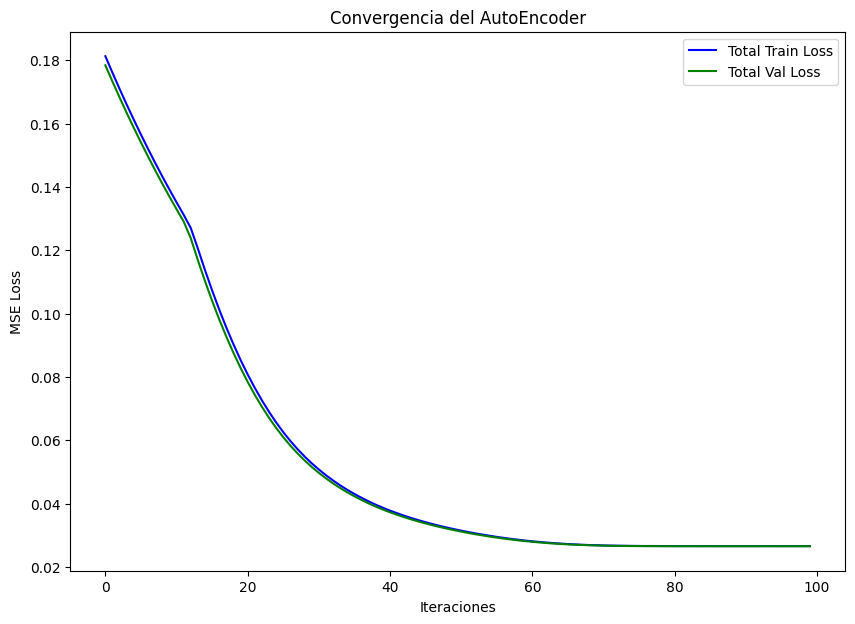

In [82]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(loss_list_train, "b", label="Total Train Loss")
ax1.plot(loss_list_val, "g", label="Total Val Loss")
plt.title("Convergencia del AutoEncoder", color="black")
ax1.set_xlabel("Iteraciones")
ax1.set_ylabel("MSE Loss", color="black")
ax1.legend(loc="upper right")
plt.show()

In [83]:
model_nlae.eval()
with torch.no_grad():
    filled_data_y = model_nlae(y_train_tensor.to(device))
    filled_data_x = model_nlae(x_train_tensor.to(device))

In [84]:
filled_data_y = minmax_scaler_ytrain.inverse_transform(filled_data_y.cpu().numpy())
filled_data_x = minmax_scaler_xtrain.inverse_transform(filled_data_x.cpu().numpy())
y_train_nlae = pd.DataFrame(filled_data_y, columns=y_train.columns)
y_train_filled_nlae = y_train.fillna(y_train_nlae)
x_train_nlae = pd.DataFrame(filled_data_x, columns=x_train.columns)
x_train_filled_nlae = x_train.fillna(x_train_nlae)

In [85]:
nrmse_values_nlae = []

for column in y_train.columns:
    nrmse_col = normalized_mrse(
        y_train_filled_nlae[column], x_train_filled_nlae[column]
    )
    nrmse_values_nlae.append(nrmse_col)

score_final = np.mean(nrmse_values_nlae)

In [86]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.01539217873273668


#### Testing NLAE

In [87]:
# Testing
model_nlae.eval()
with torch.no_grad():
    filled_data = model_nlae(x_test_tensor.to(device))

filled_data = minmax_scaler_xtest.inverse_transform(filled_data.cpu().numpy())
x_test_nlae = pd.DataFrame(filled_data, columns=x_test.columns)
x_test_filled_nlae = x_test.fillna(x_test_nlae)
y_test_nlae = pd.concat(
    [
        df_x_test[
            [
                "anonimized_id",
                "company_id",
                "year",
                "region",
                "headquarters_country",
                "industry",
                "market_cap"
            ]
        ],
        x_test_filled_nlae,
    ],
    axis=1,
)

In [88]:
y_test_nlae.to_csv("./Data/y_test_nae.csv", index=True)

Score from webpage:

In [89]:
(x_test_filled_nlae < 0).sum()

employees                                  0
revenue                                 2552
scope_1                                    0
scope_2                                    0
scope_3                                    0
waste_production                           0
waste_recycling                            0
water_consumption                          0
water_withdrawal                           0
energy_consumption                         0
hours_of_training                          0
gender_pay_gap                             3
independent_board_members_percentage       0
legal_costs_paid_for_controversies         0
ceo_compensation                           0
dtype: int64

In [90]:
print("Valores negativos para PCA, LAE y NLAE:")
print(
    f"{(x_test_filled_pca<0).sum().sum()}, {(x_test_filled_ae<0).sum().sum()}, {(x_test_filled_nlae<0).sum().sum()}"
)

Valores negativos para PCA, LAE y NLAE:
86402, 60099, 2555


Ejercicio:

* Es posible mejorar la capacidad de predicción con un nuevo autoencoder?

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)